# Histogram using openCV 6_30_2020

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [53]:
# 0 is pure black
dark_horse = cv2.imread('./original/Computer-Vision-with-Python/DATA/horse.jpg')   # openCV order of BGR for calculations
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)                           # matplotlib order of RGB for plot

rainbow = cv2.imread('./original/Computer-Vision-with-Python/DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('./original/Computer-Vision-with-Python/DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

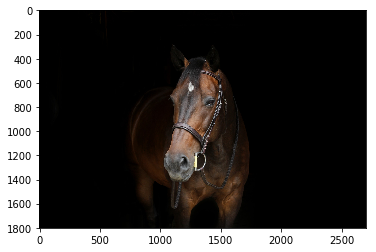

In [21]:
plt.imshow(show_horse)

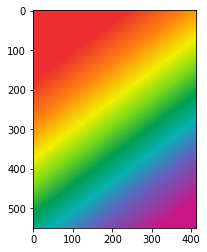

In [5]:
plt.imshow(show_rainbow)

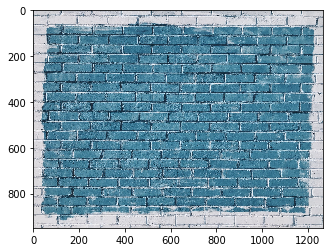

In [6]:
plt.imshow(show_bricks)

In [7]:
# blue_brick image
hist_values = cv2.calcHist([blue_bricks],channels = [0], mask = None, histSize = [256], ranges = [0,256])
hist_values.shape

(256, 1)

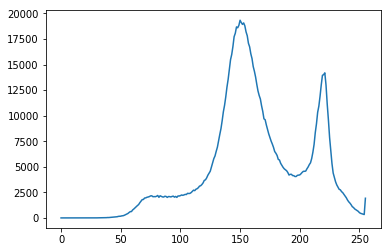

In [8]:
plt.plot(hist_values)

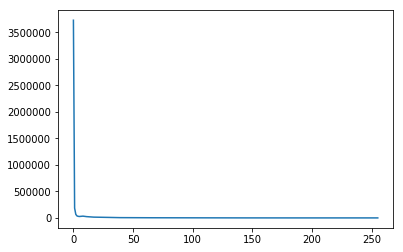

In [9]:
# dark_horse image
hist_values2 = cv2.calcHist([dark_horse],channels = [0], mask = None, histSize = [256], ranges = [0,256])
plt.plot(hist_values2)

Text(0.5, 1.0, 'Histogram for blue_bricks')

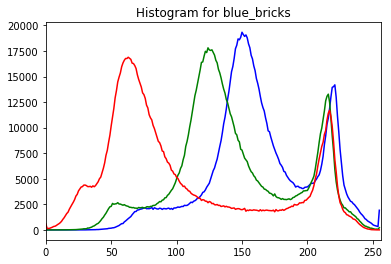

In [22]:
# now combining them in a same histogram
img = blue_bricks
img2 = dark_horse
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None, [256], [0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    
plt.title('Histogram for blue_bricks')

Text(0.5, 1.0, 'Histogram for dark_horse')

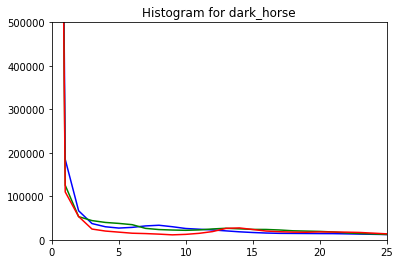

In [23]:
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img2],[i],None, [256], [0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,25])
    plt.ylim([0,500000])
    
plt.title('Histogram for dark_horse')

# Histogram Equalization

In [24]:
# 1. histogram on the masked portion of the image (only on ROI or Regional Of Interest)
# 2. histogram equalization: contrast adjustment (increase or decrease the contrast of the image)

# we will REDUCE the COLOR DEPTH ==  reduce the shades of gray   
# min and max value of the pick can be pinned and equalized to 0 and 255, if they are not, to create higher contrasts

rainbow = cv2.imread('./original/Computer-Vision-with-Python/DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

img = rainbow
img.shape




(550, 413, 3)

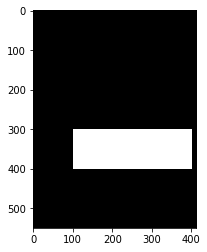

In [26]:
mask = np.zeros(img.shape[:2], np.uint8)
#plt.imshow(mask, cmap='gray')
mask[300:400, 100:400] = 255
plt.imshow(mask, cmap = 'gray')


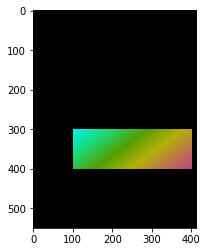

In [27]:
# plt.imshow(show_rainbow)

masked_img = cv2.bitwise_and(img,img,mask = mask)    ## for histogram calculation (BGR)
show_masked_img = cv2.bitwise_and(rainbow,rainbow, mask = mask)  ## to display using matplotlib
plt.imshow(show_masked_img)

In [28]:
hist_mask_value_red = cv2.calcHist([rainbow],channels =[2],mask=mask, histSize = [256],ranges = [0,256])  # color channel is BGR so it is 2


In [29]:
hist_mask_value_red = cv2.calcHist([rainbow],channels =[2],mask=None, histSize = [256],ranges = [0,256])

Text(0.5, 1.0, 'Histogram_red_for_masked_rainbow')

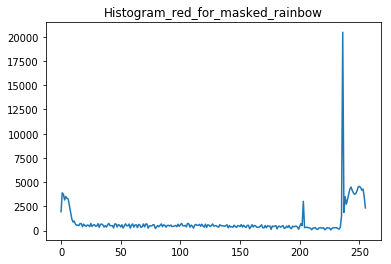

In [30]:
plt.plot(hist_mask_value_red)
plt.title('Histogram_red_for_masked_rainbow')



In [31]:
plt.plot(hist_values_red)
plt.title('Histogram_red_for_masked_rainbow')

NameError: name 'hist_values_red' is not defined

# Histogram Equalization: 6_30_2020

In [32]:
gorilla_img = cv2.imread('./original/Computer-Vision-with-Python/DATA/gorilla.jpg',0)
show_gorilla_img = cv2.cvtColor(gorilla_img, cv2.COLOR_BGR2RGB) 

In [33]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    # https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111
    '''
    These are subplot grid parameters encoded as a single integer. 
    For example, "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot".
    '''
    ax.imshow(img,cmap='gray')

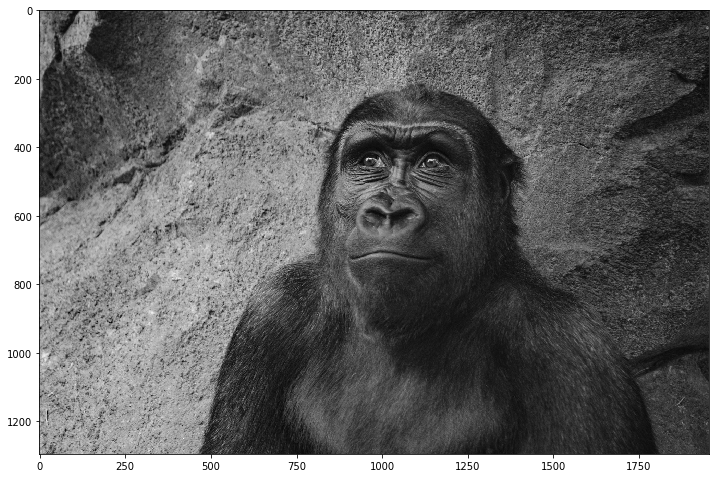

In [34]:
display_img(gorilla_img)

In [35]:
gorilla_img.shape

(1295, 1955)

In [36]:
hist_values = cv2.calcHist([gorilla_img],channels = [0], mask = None, histSize = [256], ranges = [0,256])

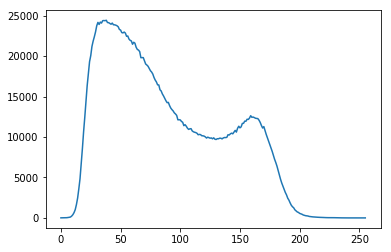

In [37]:
plt.plot(hist_values)

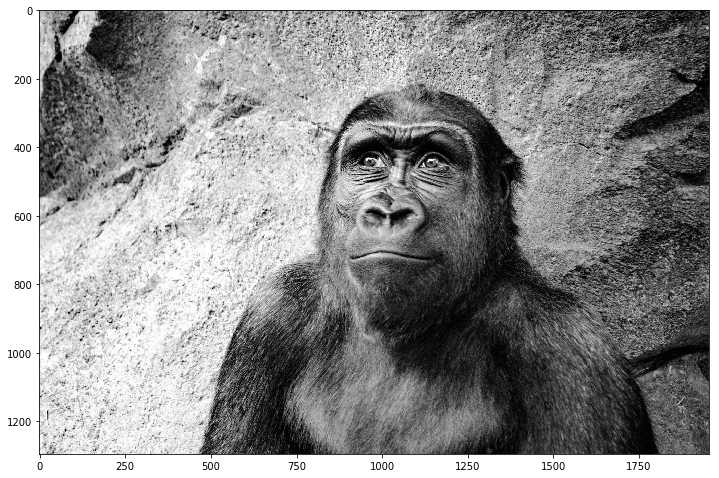

In [38]:
# now we will equalize it....meaning liniar cumulative ...
eq_gorilla = cv2.equalizeHist(gorilla_img)
display_img(eq_gorilla)   # This definitely inreased the contrast

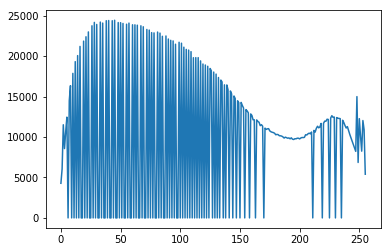

In [39]:
hist_values = cv2.calcHist([eq_gorilla],channels = [0], mask = None, histSize = [256], ranges = [0,256])
plt.plot(hist_values)

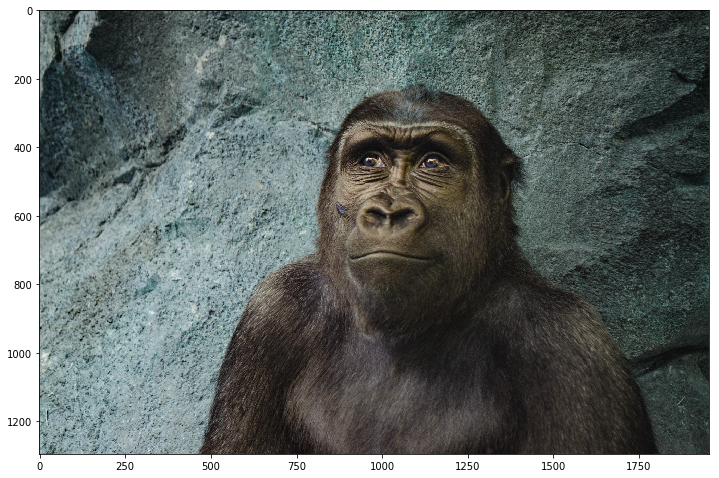

In [40]:
# now equalizing color image.
gorilla_color = cv2.imread('./original/Computer-Vision-with-Python/DATA/gorilla.jpg')
show_gorilla_color = cv2.cvtColor(gorilla_color, cv2.COLOR_BGR2RGB) 
display_img(gorilla_color)

In [41]:
# Now EQUALIZE a color image === to do that you have to convert it to HSV color space
hsv = cv2.cvtColor(gorilla_color, cv2.COLOR_BGR2HSV)

In [42]:
hsv[:,:,2]
print(hsv[:,:,2].max())

255


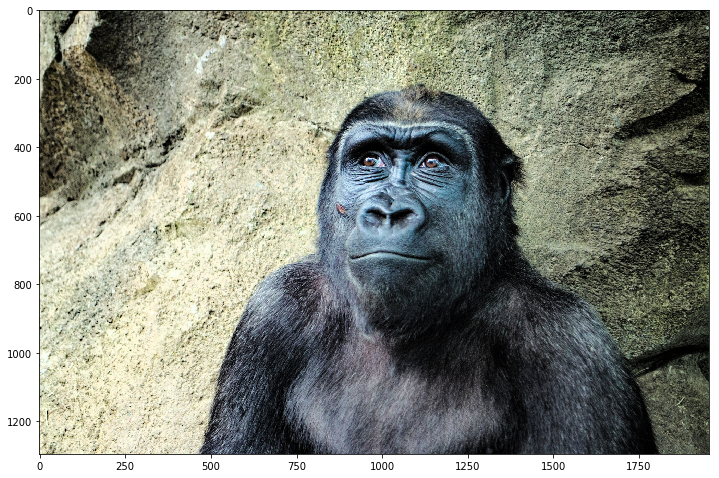

In [43]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])   # Higher contrast 
equalized_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display_img(equalized_color_gorilla)

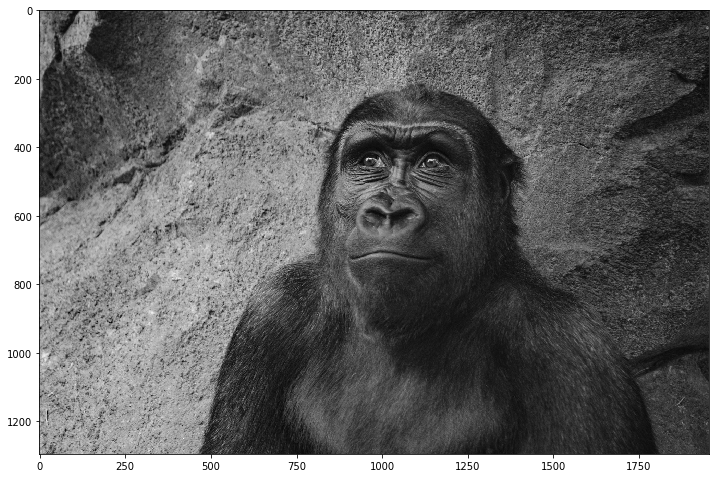

In [56]:
gorilla = cv2.imread('./original/Computer-Vision-with-Python/DATA/gorilla.jpg',0)
display_img(gorilla)

In [57]:
gorilla.shape

(1295, 1955)

In [59]:
hist_values = cv2.calcHist([gorilla], channels = [0], mask = None,histSize = [256], ranges = [0,256])

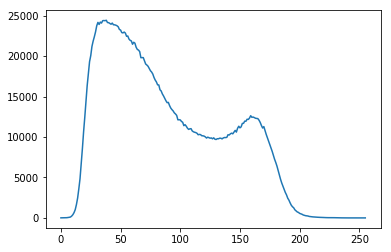

In [60]:
plt.plot(hist_values)

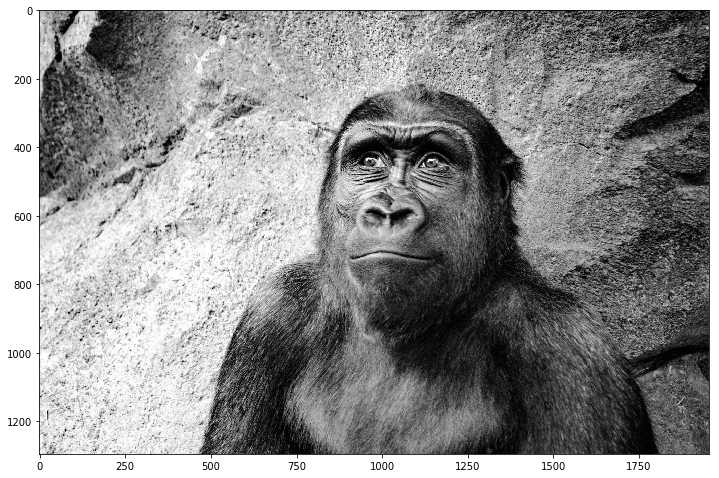

In [61]:
# 250 being the pure black and 0 being pure white 
eq_gorilla = cv2.equalizeHist(gorilla)   ## equzlizeHIst is used to create more contrasts
display_img(eq_gorilla)

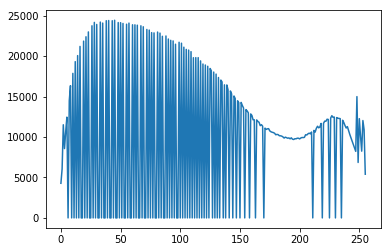

In [65]:
hist_values_eq = cv2.calcHist([eq_gorilla], channels = [0], mask = None,histSize = [256], ranges = [0,256])

plt.plot(hist_values_eq)

# Now we attempt to equalize the color image

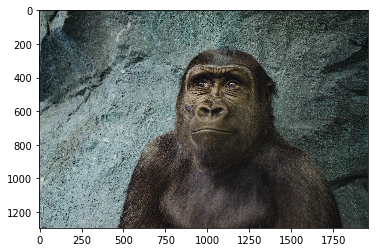

In [70]:
gorilla_c = cv2.imread('./original/Computer-Vision-with-Python/DATA/gorilla.jpg')
plt.imshow(gorilla_c)
gorilla_rc = cv2.cvtColor(gorilla_c, cv2.COLOR_BGR2RGB)

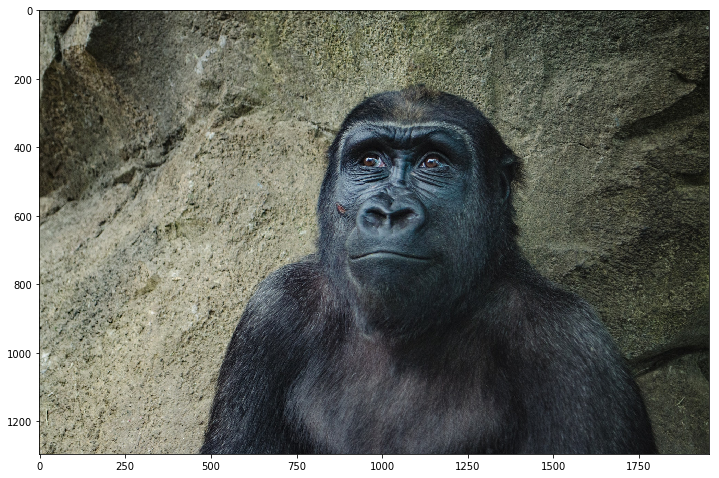

In [71]:
display_img(gorilla_rc)
# to equzlize (like so...cv2.equalizeHist(gorilla_rc)) the color image as below, you have to first make it into HSV

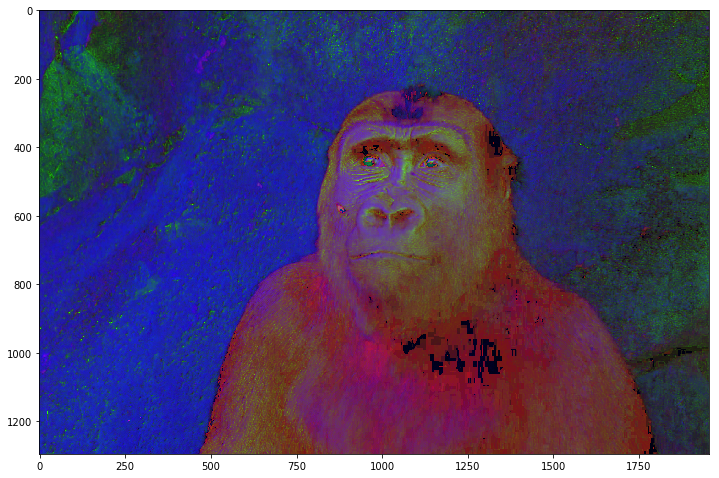

In [73]:
hsv = cv2.cvtColor(gorilla_c, cv2.COLOR_BGR2HSV)
display_img(hsv)

In [74]:
# we are interested in grabbing the value channel
hsv[:,:,2]   #this below is the value channel of the hsv image above

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 198, 185, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [174, 170, 173, ...,  49,  50,  50]], dtype=uint8)

In [75]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

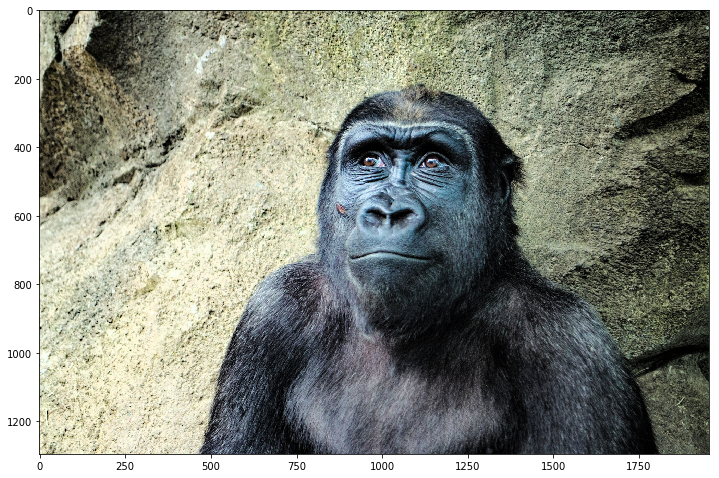

In [76]:
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display_img(eq_color_gorilla)